<a href="https://colab.research.google.com/github/dev-rafaelmachado/BCC/blob/main/Atividade_Avaliativa_Individual_RA3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Atenção: Regras para a solução da atividade.**

1. copie este caderno para a sua conta, criando as células de texto e código que forem necessárias após o enunciado de cada questão;

2. não apague os enunciados;

3. responda as questões na ordem em que elas se apresentam neste caderno;

4. você pode, e deve, consultar todo e qualquer recurso disponível na internet. Mas, não pode consultar nenhum outro ser humano.

5. poste no AVA (Canvas) o link para a sua resposta. Pode ser um link para a solução no Google Colab, ou um link para o caderno com suas respostas no Github.

A violação de qualquer uma destas regras provoca a anulação da avaliação.

Qualquer link que não possa ser executado a partir do link postado irá zerar a avaliação.

Qualquer link que leve a uma pasta, arquivo comprimido, ou qualquer outro destino que não seja um caderno executável com as suas repostas provocará a anulação da questão.

**Teste usando outro navegador que não esteja logado nas suas contas**.

Qualquer link que não possa ser aberto, irá zerar a avaliação.

Qualquer comunicação com outro ser humano irá zerar a avaliação.

**A interpretação faz parte da Questão!!!**

# Questão 1 (vale até 2 pontos)
Determine a área entre as curvas $$y=xe^{-x^{2}}$$ $$y=x+1$$ $$x=2$$ e o eixo $y$, usando somente matplotlib, numpy, sympy. Trace o gráfico desta área preenchendo a área entre as curvas em uma cor diferente.



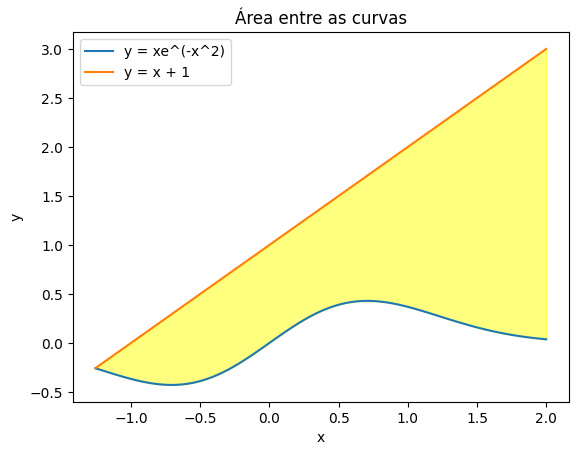

A área entre as curvas é -0.09


In [26]:

# Rafael Machado BCC 3Per Turma A

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

def f1(x):
    return x * np.exp(-x**2)

def f2(x):
    return x + 1

x = sp.symbols('x')

expr1 = x * sp.exp(-x**2)
expr2 = x + 1

f1_numeric = sp.lambdify(x, expr1, modules='numpy')
f2_numeric = sp.lambdify(x, expr2, modules='numpy')

x_vals = np.linspace(-2, 2, 100)
y1_vals = f1_numeric(x_vals)
y2_vals = f2_numeric(x_vals)

intersections = []
for i in range(len(x_vals) - 1):
    x1, x2 = x_vals[i], x_vals[i + 1]
    y1, y2 = y1_vals[i], y1_vals[i + 1]
    if np.sign(y1 - y2) != np.sign(f1_numeric(x2) - f2_numeric(x2)):
        intersection_x = sp.Symbol('intersection_x')
        equation = sp.Eq(expr1.subs(x, intersection_x), expr2.subs(x, intersection_x))
        intersection_point = sp.nsolve(equation, intersection_x, x2)
        intersections.append(float(intersection_point))

a = 2
b = intersections[0]

x_vals = np.linspace(a, b, 100)
y1_vals = f1_numeric(x_vals)
y2_vals = f2_numeric(x_vals)
area = np.trapz(np.minimum(y1_vals, y2_vals), x_vals)

plt.plot(x_vals, y1_vals, label='y = xe^(-x^2)')
plt.plot(x_vals, y2_vals, label='y = x + 1')

plt.fill_between(x_vals, y1_vals, y2_vals, where=(y1_vals <= y2_vals), color='yellow', alpha=0.5)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.title('Área entre as curvas')
plt.show()

print(f"A área entre as curvas é {area:.2f}")


# Questão 2 (vale até 2 pontos)
Resolva, algebricamente, explicitando em latex todos os passos necessários, as seguintes integrais:

##a)
$$\int \cos(3t) \sin(8t) dt $$
##b)
$$\int 4x \cos(2-3x) dx$$


---
# Resposta:

a) $$\cos(3t)\sin(8t)dt$$

Vamos usar a identidade trigonométrica:

$$\sin(A)\cos(B) = \frac{1}{2}[\sin(A - B) + \sin(A + B)]$$



simplificando a integral...


$$\int \cos(3t)\sin(8t)dt = \frac{1}{2}$$

$$\int[\sin(8t + 3t) + \sin(8t - 3t)]dt = \frac{1}{2}$$

$$\int[\sin(11t) + \sin(5t)]dt$$


A solução para a integral é:

$$\int \cos(3t)\sin(8t)dt = \frac{-1}{11}\cos(11t) + \frac{-1}{5}\cos(5t) + C$$

<br>

---

<br>

b) $$\int 4x\cos(2-3x)dx$$


Vamos usar uma substituição de variáveis para simplificar a integral.

Se $ u = 2-3x $ então $ du = -3dx $

Rearranjando a equação, temos $ dx = -(1/3)du $.

Substituindo na integral, temos:

$$\int 4x\cos(2-3x)dx = \int 4x\cos(u)\left(-\frac{1}{3}\right)du = -\frac{4}{3}\int x \cos(u)du$$


A integral de:

$$x\cos(u)du = \frac{1}{2}x\cos(u) + \frac{1}{6}\sin(u) + C$$

é:

$$= -\frac{4}{3}\left(\frac{1}{2}x\cos(u) + \frac{1}{6}\sin(u)\right) + C$$


Substituindo de volta $ u = 2-3x $ temos:

$$-\frac{4}{3}\left(\frac{1}{2}x\cos(2-3x) + \frac{1}{6}\sin(2-3x)\right) + C$$

solução para a integral é:

$$-\frac{2}{3}x\cos(2-3x) - \frac{1}{9}\sin(2-3x) + C$$


# Questão 3 (vale até 4 pontos)
Calcule o valor das integrais definidas explicitadas a seguir. Trace o gráfico das funções que foram integradas e das funções encontradas após a integração destacando, com linhas verticais, os limites de integração.

##a)
$$\int_0^2 x^2+1 \space dx$$

##b)
$$\int_{-3}^1 6x^2-5x+2 \space dx$$



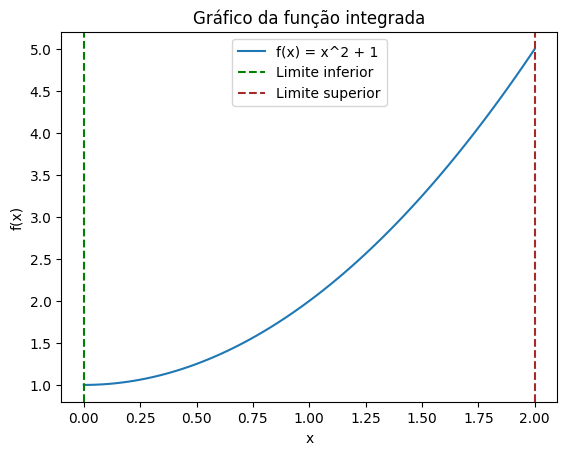

O valor da integral definida de x^2 + 1 no intervalo [0, 2] é 4.67


In [14]:
 # a)
def f(x):
    return x**2 + 1

a = 0
b = 2

integral = np.trapz(f(np.linspace(a, b, 100)), np.linspace(a, b, 100))

x_vals = np.linspace(a, b, 100)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='f(x) = x^2 + 1')
plt.axvline(x=a, color='green', linestyle='--', label='Limite inferior')
plt.axvline(x=b, color='brown', linestyle='--', label='Limite superior')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.title('Gráfico da função integrada')
plt.show()

print(f"O valor da integral definida de x^2 + 1 no intervalo [0, 2] é {integral:.2f}")

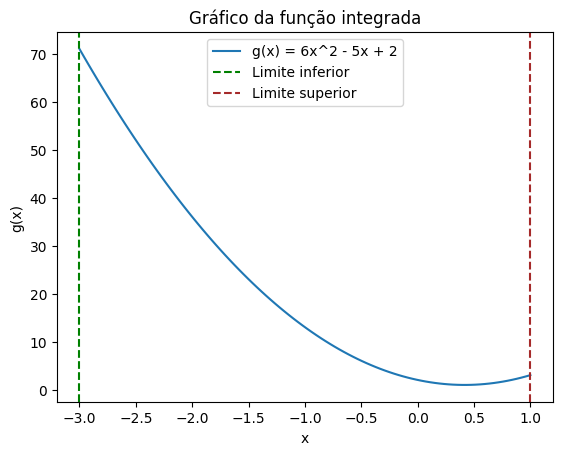

O valor da integral definida de 6x^2 - 5x + 2 no intervalo [-3, 1] é 84.01


In [15]:
# b)
def g(x):
    return 6*x**2 - 5*x + 2

a = -3
b = 1

integral = np.trapz(g(np.linspace(a, b, 100)), np.linspace(a, b, 100))

x_vals = np.linspace(a, b, 100)
y_vals = g(x_vals)

plt.plot(x_vals, y_vals, label='g(x) = 6x^2 - 5x + 2')
plt.axvline(x=a, color='green', linestyle='--', label='Limite inferior')
plt.axvline(x=b, color='brown', linestyle='--', label='Limite superior')

plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()

plt.title('Gráfico da função integrada')
plt.show()

print(f"O valor da integral definida de 6x^2 - 5x + 2 no intervalo [-3, 1] é {integral:.2f}")

#Questão 4 (vale até 1 ponto)
A taxa de variação de juros nos primeiros meses do ano de 2023 é dada por $v = 3t^2 - e^t$. Onde $t$ é o tempo dado em dias. Encontre a função que determina o juro, $j$ a ser pago em um determinado dia deste período de forma algébrica em latex.



Para determinar a função que determina o juro a ser pago em um determinado dia do período dado, podemos realizar a integração da taxa de variação dos juros em relação ao tempo. A função que representa o juro, $j$, em relação ao tempo, $t$, é obtida através da seguinte integral:

$$j = \int (3t^2 - e^t) \, dt $$

Integrando termo a termo, temos:

$$ j = \int 3t^2 \, dt - \int e^t \, dt $$

A integral de $3t^2$ em relação a $t$ é dada por:

$$ \int 3t^2 \, dt = t^3 + C_1 $$

onde $C_1$ é uma constante de integração.

A integral de $e^t$ em relação a $t$ é dada por:

$$ \int e^t \, dt = e^t + C_2 $$

onde $C_2$ é uma constante de integração.

Portanto, a função que determina o juro a ser pago em um determinado dia deste período é dada por:

$$ j = t^3 - e^t + C $$

onde $C = C_1 + C_2$ é uma constante de integração.


#Questão 5 (vale até 1 ponto)
Encontre o valor da constante C para a antiderivada $F(x)$ da função $f(x) = 3x^3 - 2x + 1$ de tal forma que $F(1)=0$. Apresente seus cálculos em latex e explique as decisões que tomou.

Para encontrar o valor da constante C na antiderivada $F(x)$ da função $f(x)$, precisamos primeiro calcular a antiderivada geral de $f(x)$ e, em seguida, aplicar a condição $F(1) = 0$ para determinar o valor de $C$.

A antiderivada geral de $f(x)$ é calculada através da integração de cada termo separadamente. Vamos calcular termo a termo:

$$\int 3x^3 \, dx = \frac{3}{4}x^4 + C_1$$

$$\int -2x \, dx = -x^2 + C_2$$

$$\int 1 \, dx = x + C_3$$

Agora, somando as antiderivadas dos termos, temos:

$$F(x) = \frac{3}{4}x^4 + C_1 - x^2 + C_2 + x + C_3$$

Podemos simplificar essa expressão combinando as constantes:

$$F(x) = \frac{3}{4}x^4 - x^2 + x + (C_1 + C_2 + C_3)$$

Agora, aplicando a condição F(1) = 0, temos:

$$F(1) = \frac{3}{4}(1)^4 - (1)^2 + 1 + (C_1 + C_2 + C_3) = 0$$

Simplificando a equação:

$$\frac{3}{4} - 1 + 1 + (C_1 + C_2 + C_3) = 0$$

$$\frac{3}{4} + (C_1 + C_2 + C_3) = 0$$

Agora, resolvendo a equação para encontrar o valor de C:

$$C_1 + C_2 + C_3 = -\frac{3}{4}$$

Portanto, o valor da constante $C$ é igual a $-3/4$.

Dessa forma, a antiderivada $F(x)$ da função $f(x) = 3x^3 - 2x + 1$ com a condição $F(1) = 0$ é:

$$F(x) = \frac{3}{4}x^4 - x^2 + x - \frac{3}{4}$$